# Homework \#3.1

In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

In [32]:
# read data
securities = pd.read_excel('data/hw_3_1_data.xlsx', sheet_name='security returns')
portfolio = pd.read_excel('data/hw_3_1_data.xlsx', sheet_name='portfolio returns')
data = pd.merge(securities, portfolio, on='Date')

# 1. Regression

### 1. Estimation of regression of the portfolio return on SPY

In [33]:
# Get dependant variable and regressor
y = data.portfolio
X = data.SPY

In [34]:
# Add intercept
X = sm.add_constant(X)

In [35]:
# Define and train model
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     455.5
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           3.93e-48
Time:                        21:08:10   Log-Likelihood:                 443.21
No. Observations:                 158   AIC:                            -882.4
Df Residuals:                     156   BIC:                            -876.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.479      0.633      -0.003       0.002
SPY            0.6142      0.029     21.342      0.000       0.557       0.671
==============================================================================
Omnibus:                       21.658   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.437
Skew:                           0.448   Prob(JB):                     6.17e-15
Kurtosis:                       6.023   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary we have: </br>
$\alpha = -6*10^{-4}$ </br>
$\beta = 0.6142$ </br>
$R^{2} = 0.745$ </br>

### 2. Estimation of regression of portfolio on SPY and HYG

In [36]:
# Get regressors
X =  data[['SPY', 'HYG']]
X = sm.add_constant(X)

In [37]:
# Define and train model
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     384.2
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           8.57e-61
Time:                        21:08:12   Log-Likelihood:                 476.28
No. Observations:                 158   AIC:                            -946.6
Df Residuals:                     155   BIC:                            -937.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.915      0.362      -0.003       0.001
SPY            0.3843      0.035     11.072      0.000       0.316       0.453
HYG            0.5166      0.058      8.977      0.000       0.403       0.630
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.296
Skew:                           0.214   Prob(JB):                        0.523
Kurtosis:                       2.886   Cond. No.                         66.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary we have: </br>
$\alpha = -9*10^{-4}$ </br>
$\tilde{\beta}^{spy} = 0.3843$ </br>
$\tilde{\beta}^{hyg} = 0.5166$ </br>
$R^{2} = 0.832$ </br>

### 3. Time series of fitted regression

<AxesSubplot:title={'center':'Predicted time series'}>

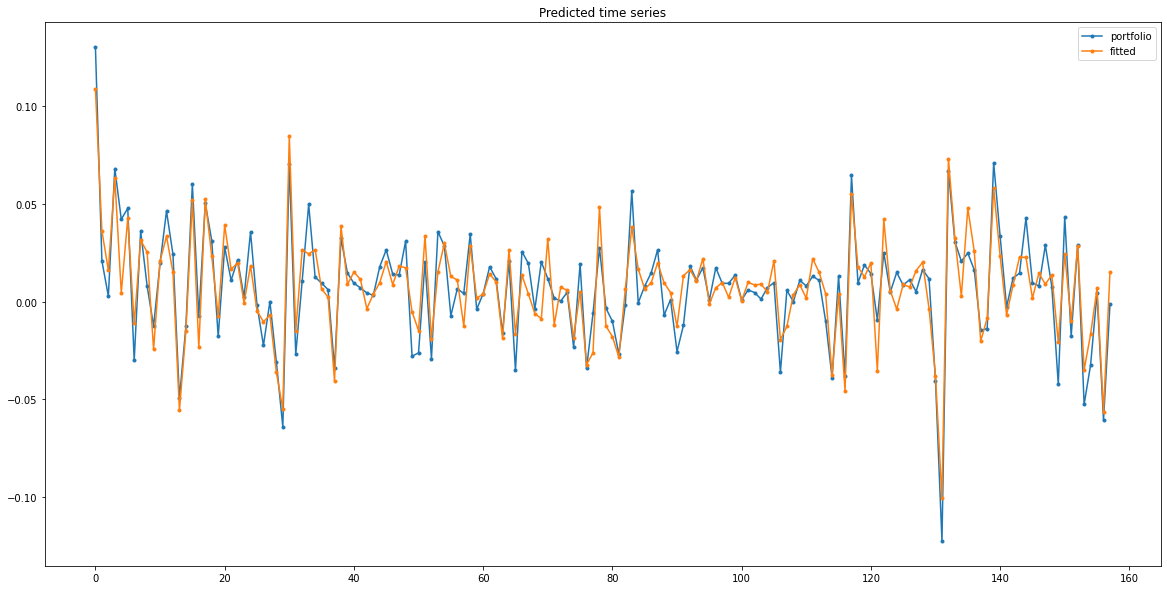

In [38]:
fitted = pd.concat([y, pd.DataFrame(data=results.predict(X), index=X.index, columns=['fitted'])],axis=1)
fitted.plot(title='Predicted time series', figsize=(20, 10), marker='.')

### Correlation between $\hat{r}^{p}_{t}$ and $r^{p}_{t}$

In [40]:
fitted.corr()['fitted'].iloc[0]

0.9122188878695541

The r-squared of the regression in equation $(2)$ is **0.832**, which is squared correlation. <br />
$R^{2} = corr(\hat{r}^{p}_{t}, r^{p}_{t})^2$ <br/>
$0.912^2 = 0.832$

### 4. 

In [25]:
data[['SPY', 'HYG']].corr()['SPY'].iloc[1]

0.7380152522818174

$\beta^{spy}=0.6142$ in $(1)$ and $\tilde{\beta}^{spy}=0.3843$ in $(2)$. Hence, $\beta^{spy}$ is greater than $\tilde{\beta}^{spy}$</br>
The correlation between SPY and HYG is 0.738, which is fairly high. This means that the addition HYG as a regressor "dilutes" the contribution of SPY given the high correlation between the regressors.

### 5.

$\epsilon_{t}$ should have higher correlation with $r_{t}^{hyg}$ because the contribution of HYG isn't accounted for in equation $(1)$

# 2. Decomposing and Replicating

### 1.

In [41]:
# Get data
X = data.drop(columns=['Date', 'portfolio'])
y = data.portfolio

In [44]:
# Define and train model
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              portfolio   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.265e+31
Date:                Fri, 17 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:20:44   Log-Likelihood:                          5886.6
No. Observations:                 158   AIC:                                 -1.175e+04
Df Residuals:                     146   BIC:                                 -1.171e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPY        -1.388e-16   8.83e-17     -1.572      0.118   -3.13e-16    3.57e-17
EFA        -1.631e-16   8.89e-17     -1.834      0.069   -3.39e-16    1.27e-17
EEM         1.795e-16   5.36e-17      3.353      0.001    7.37e-17    2.85e-16
PSP            0.2500   6.65e-17   3.76e+15      0.000       0.250       0.250
QAI            0.2500   2.35e-16   1.07e+15      0.000       0.250       0.250
HYG         6.245e-17   1.06e-16      0.589      0.557   -1.47e-16    2.72e-16
DBC         2.602e-17   3.74e-17      0.696      0.488   -4.79e-17    9.99e-17
IYR            0.2500   4.49e-17   5.57e+15      0.000       0.250       0.250
IEF            0.2500   1.72e-16   1.45e+15      0.000       0.250       0.250
BWX        -4.163e-16   1.05e-16     -3.966      0.000   -6.24e-16   -2.09e-16
TIP         2.498e-16   1.81e-16      1.380      0.170   -1.08e-16    6.08e-16
SHV        -1.998e-15   1.69e-15     -1.180      0.240   -5.34e-15    1.35e-15
==============================================================================
Omnibus:                       16.743   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.017
Skew:                          -0.457   Prob(JB):                     4.11e-08
Kurtosis:                       5.081   Cond. No.                         148.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(f'R-squared={model.score(X,y):.1%}\n')

R-squared=100.0%



$R^{2}=1$ and most of the p-values are fairly small except SPY, EFA, HYG, DBC, TIP, SHV which have fairly high p-values. </br> 
This means that SPY, EFA, HYG, DBC, TIP, SHV  could probably be dropped and we might be in a case of multicollinearity. </br>
This is confirmed by looking at correlation between the different regressors.

In [49]:
X.corr()

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
SPY,1.000000,0.870442,0.745783,0.898231,0.824195,0.738015,0.494878,0.729380,-0.328994,0.396518,0.133461,-0.188770
EFA,0.870442,1.000000,0.851419,0.904902,0.830989,0.754128,0.578556,0.669530,-0.311080,0.555326,0.150718,-0.164695
EEM,0.745783,0.851419,1.000000,0.796636,0.800204,0.745494,0.558936,0.602921,-0.253120,0.605679,0.227127,-0.108709
PSP,0.898231,0.904902,0.796636,1.000000,0.816837,0.811426,0.485035,0.735933,-0.304329,0.479871,0.166646,-0.197484
QAI,0.824195,0.830989,0.800204,0.816837,1.000000,0.747438,0.528369,0.609704,-0.076178,0.627330,0.362914,-0.111919
HYG,0.738015,0.754128,0.745494,0.811426,0.747438,1.000000,0.460295,0.736795,-0.154525,0.506191,0.228484,-0.127966
DBC,0.494878,0.578556,0.558936,0.485035,0.528369,0.460295,1.000000,0.282182,-0.414040,0.325509,0.064876,-0.186284
IYR,0.729380,0.669530,0.602921,0.735933,0.609704,0.736795,0.282182,1.000000,-0.060926,0.384561,0.284086,-0.136627
IEF,-0.328994,-0.311080,-0.253120,-0.304329,-0.076178,-0.154525,-0.414040,-0.060926,1.000000,0.323693,0.672219,0.296611
BWX,0.396518,0.555326,0.605679,0.479871,0.627330,0.506191,0.325509,0.384561,0.323693,1.000000,0.555304,0.102626


In [50]:
# Define and train model
model = sm.OLS(y, X.drop(columns=['SPY', 'EFA', 'HYG', 'DBC', 'TIP', 'SHV']))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              portfolio   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.467e+32
Date:                Fri, 17 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:12:14   Log-Likelihood:                          5926.2
No. Observations:                 158   AIC:                                 -1.184e+04
Df Residuals:                     152   BIC:                                 -1.182e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EEM        -1.769e-16   3.77e-17     -4.692      0.000   -2.51e-16   -1.02e-16
PSP            0.2500   3.84e-17   6.52e+15      0.000       0.250       0.250
QAI            0.2500   1.52e-16   1.64e+15      0.000       0.250       0.250
IYR            0.2500   2.97e-17   8.41e+15      0.000       0.250       0.250
IEF            0.2500   8.26e-17   3.03e+15      0.000       0.250       0.250
BWX        -1.041e-16   7.44e-17     -1.399      0.164   -2.51e-16    4.29e-17
==============================================================================
Omnibus:                        2.854   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.622
Skew:                          -0.156   Prob(JB):                        0.270
Kurtosis:                       3.549   Cond. No.                         14.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model = sm.OLS(y, X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              portfolio   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.265e+31
Date:                Fri, 17 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:12:14   Log-Likelihood:                          5886.6
No. Observations:                 158   AIC:                                 -1.175e+04
Df Residuals:                     146   BIC:                                 -1.171e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPY        -1.388e-16   8.83e-17     -1.572      0.118   -3.13e-16    3.57e-17
EFA        -1.631e-16   8.89e-17     -1.834      0.069   -3.39e-16    1.27e-17
EEM         1.795e-16   5.36e-17      3.353      0.001    7.37e-17    2.85e-16
PSP            0.2500   6.65e-17   3.76e+15      0.000       0.250       0.250
QAI            0.2500   2.35e-16   1.07e+15      0.000       0.250       0.250
HYG         6.245e-17   1.06e-16      0.589      0.557   -1.47e-16    2.72e-16
DBC         2.602e-17   3.74e-17      0.696      0.488   -4.79e-17    9.99e-17
IYR            0.2500   4.49e-17   5.57e+15      0.000       0.250       0.250
IEF            0.2500   1.72e-16   1.45e+15      0.000       0.250       0.250
BWX        -4.163e-16   1.05e-16     -3.966      0.000   -6.24e-16   -2.09e-16
TIP         2.498e-16   1.81e-16      1.380      0.170   -1.08e-16    6.08e-16
SHV        -1.998e-15   1.69e-15     -1.180      0.240   -5.34e-15    1.35e-15
==============================================================================
Omnibus:                       16.743   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.017
Skew:                          -0.457   Prob(JB):                     4.11e-08
Kurtosis:                       5.081   Cond. No.                         148.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2

In [52]:
data_2018 = data.loc[data.Date.dt.year < 2019]
X = data_2018.drop(columns=['Date', 'TIP'])
y = data_2018.TIP

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TIP   R-squared (uncentered):                   0.706
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              23.10
Date:                Fri, 17 Jun 2022   Prob (F-statistic):                    2.10e-23
Time:                        22:12:14   Log-Likelihood:                          409.79
No. Observations:                 117   AIC:                                     -797.6
Df Residuals:                     106   BIC:                                     -767.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPY           -0.0083      0.052     -0.161      0.872      -0.111       0.094
EFA           -0.0205      0.048     -0.425      0.672      -0.116       0.075
EEM            0.0663      0.028      2.372      0.019       0.011       0.122
PSP           -0.0123      0.036     -0.345      0.731      -0.083       0.059
QAI            0.0109      0.118      0.092      0.927      -0.222       0.244
HYG           -0.0640      0.058     -1.099      0.274      -0.180       0.051
DBC            0.0733      0.021      3.486      0.001       0.032       0.115
IYR           -0.0223      0.024     -0.919      0.360      -0.070       0.026
IEF            0.6523      0.067      9.678      0.000       0.519       0.786
BWX           -0.0046      0.056     -0.083      0.934      -0.115       0.106
SHV           -0.9685      1.271     -0.762      0.448      -3.489       1.552
portfolio      0.1571      0.026      5.975      0.000       0.105       0.209
==============================================================================
Omnibus:                        3.855   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.365
Skew:                          -0.300   Prob(JB):                        0.186
Kurtosis:                       3.575   Cond. No.                     2.09e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.43e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

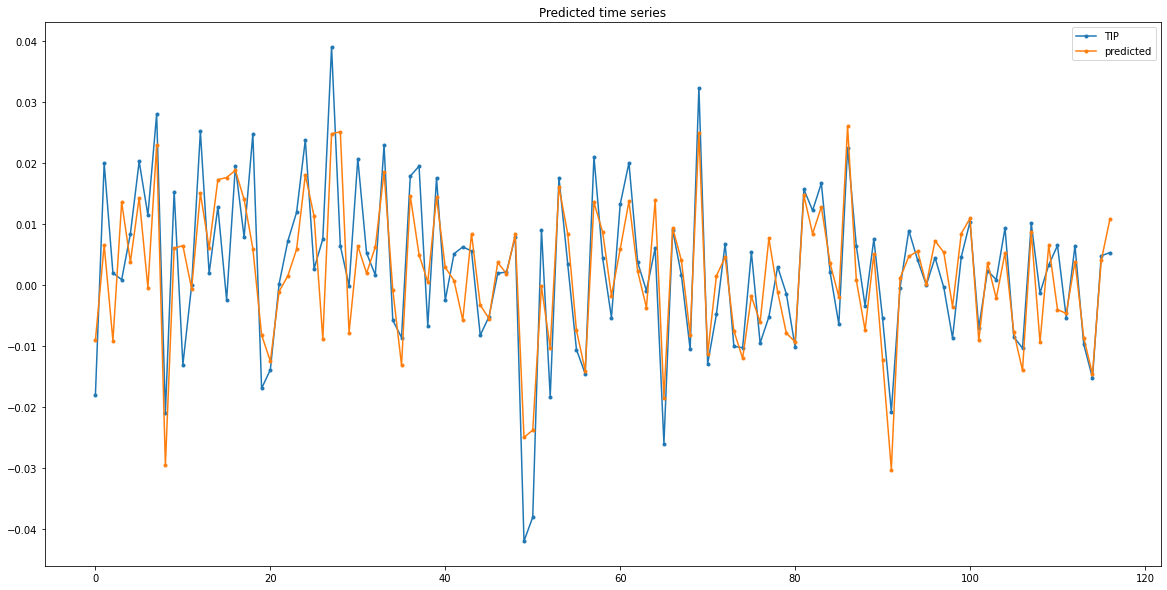

In [53]:
prediction_df = pd.concat([y, pd.DataFrame(data=results.predict(X), index=X.index, columns=['predicted'])],axis=1)
prediction_df.plot(title='Predicted time series', figsize=(20, 10), marker='.')
plt.show()

### 3

In [54]:
data_2019_2022 = data.loc[data.Date.dt.year >= 2019]
X = data_2019_2022.drop(columns=['Date', 'TIP'])
y = data_2019_2022.TIP
prediction_df = pd.concat([y, pd.DataFrame(data=results.predict(X), index=X.index, columns=['predicted'])],axis=1)

In [55]:
prediction_df.head()

,TIP,predicted
117,0.014245,0.015244
118,-0.001711,-0.004338
119,0.019751,0.016477
120,0.002211,-0.002687
121,0.017522,0.010135


In [56]:
prediction_df.corr()['TIP'].iloc[1]

0.8057996889905984

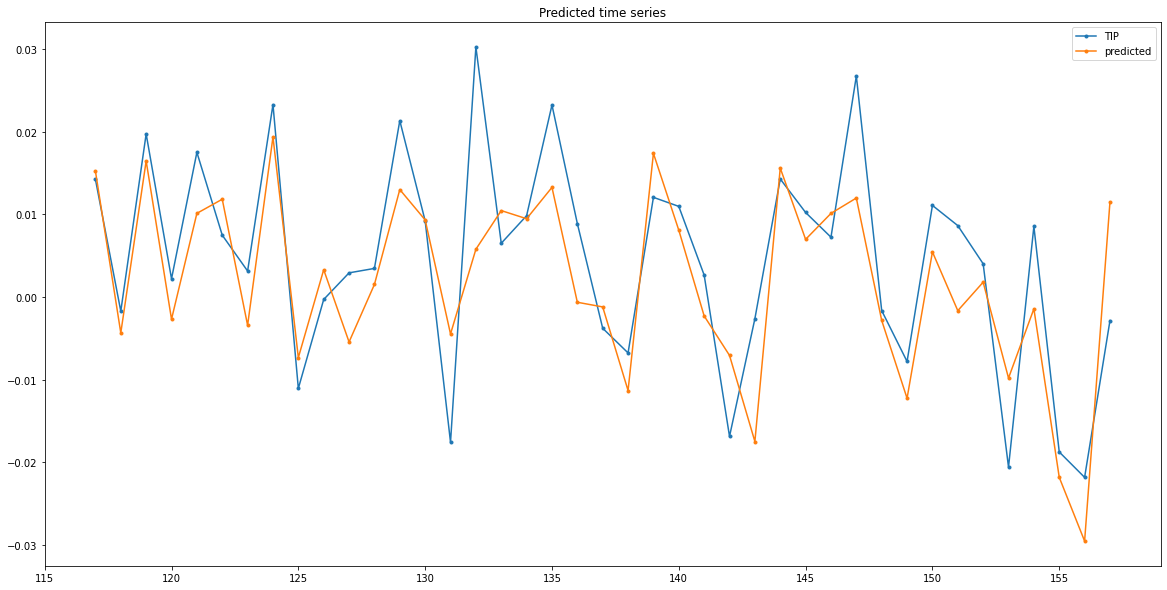

In [57]:
prediction_df.plot(title='Predicted time series', figsize=(20, 10), marker='.')
plt.show()